In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [86]:
import json

In [116]:
with open("ReportEventCounter_southern_pfpr25_burnin.json",'r') as f:
    d = json.load(f)

In [117]:
reported_cases = np.array(d["Channels"]["Received_Treatment"]["Data"])

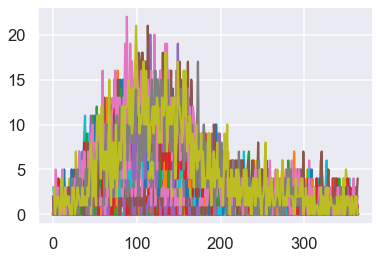

In [118]:
for y in range(49):
    plt.plot(np.arange(365), reported_cases[y*365:(y+1)*365],label=y)

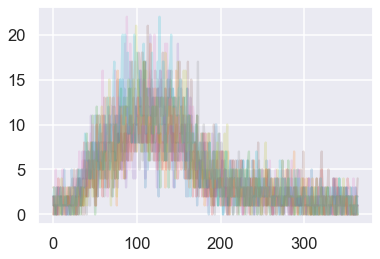

In [119]:
for y in range(40,50):
    plt.plot(np.arange(365), reported_cases[y*365:(y+1)*365],label=y, alpha=0.2)

In [120]:
w=np.repeat(np.arange(1,54),7)[:365]
two_w = np.repeat(np.arange(1,30),14)[:365]
# m = np.repeat(np.arange(1,13),30)[:365]

In [121]:
cases_norm = reported_cases[40*365:]

df_list = []
for y in range(9):
    cases_this_year = cases_norm[y*365:(y+1)*365]
    sdf = pd.DataFrame({
        "year": y,
        "day": np.arange(365),
        "week": w,
        "two_w": two_w,
        "cases": cases_this_year,
        "cases_norm": cases_this_year/np.max(cases_this_year)
    })
    
    sdf_agg_to_week = sdf.groupby("week").agg({"cases": "sum"}).reset_index()
    sdf_agg_to_week["cases_norm"] = sdf_agg_to_week["cases"]/np.max(sdf_agg_to_week["cases"])
    sdf_agg_to_week["year"] = y
    
    sdf_agg_to_2week = sdf.groupby("two_w").agg({"cases": "sum"}).reset_index()
    sdf_agg_to_2week["cases_norm"] = sdf_agg_to_2week["cases"]/np.max(sdf_agg_to_2week["cases"])
    sdf_agg_to_2week["year"] = y
    
    df_list.append(sdf_agg_to_2week.copy())
#     df_list.append(sdf_agg_to_week.copy())
#     df_list.append(sdf.copy())
    
df = pd.concat(df_list)

In [102]:
for y, sdf in df.groupby("year"):
    plt.plot(sdf["day"], sdf["cases_norm"])

KeyError: 'day'

In [99]:
for y, sdf in df.groupby("year"):
    plt.plot(sdf["week"], sdf["cases_norm"])

KeyError: 'week'

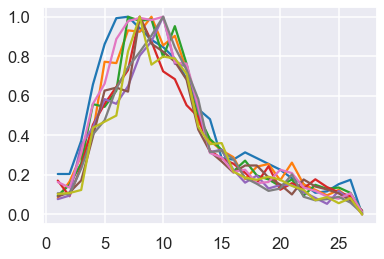

In [103]:
for y, sdf in df.groupby("year"):
    plt.plot(sdf["two_w"], sdf["cases_norm"])

In [96]:
df_smooth = df.groupby("week").agg({"cases_norm": "mean"}).reset_index()

KeyError: 'week'

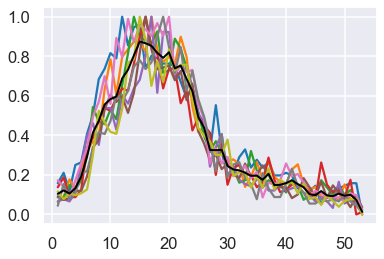

In [58]:
for y, sdf in df.groupby("year"):
    plt.plot(sdf["week"], sdf["cases_norm"])
plt.plot(df_smooth["week"], df_smooth["cases_norm"], color='black', lw=2)

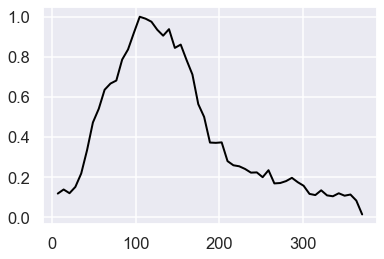

In [60]:
plt.plot(df_smooth["week"]*7, df_smooth["cases_norm"]/np.max(df_smooth["cases_norm"]), color='black', lw=2)
plt.savefig("figures/2021-04-13_dryrun/southern_incidence_seasonality.pdf")

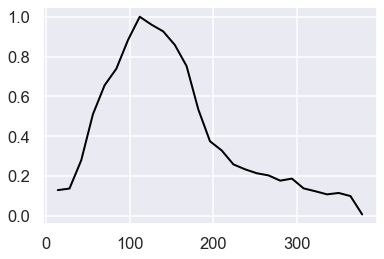

In [123]:
df_smooth = df.groupby("two_w").agg({"cases_norm": "mean"}).reset_index()
plt.plot(df_smooth["two_w"]*14, df_smooth["cases_norm"]/np.max(df_smooth["cases_norm"]), color='black', lw=2)
plt.savefig("figures/2021-04-13_dryrun/southern_incidence_seasonality_two_week.pdf")

In [53]:
df_smooth = df.groupby("week").agg({"cases": "sum"}).reset_index()

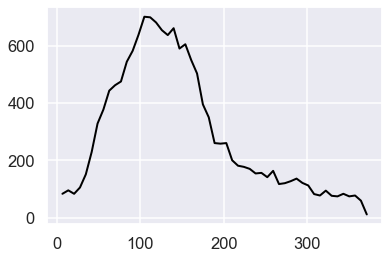

In [55]:
plt.plot(df_smooth["week"]*7, df_smooth["cases"], color='black', lw=2)

## Sahel

In [108]:
with open("ReportEventCounter_sahel_pfpr25_burnin.json",'r') as f:
    d = json.load(f)
reported_cases = np.array(d["Channels"]["Received_Treatment"]["Data"])

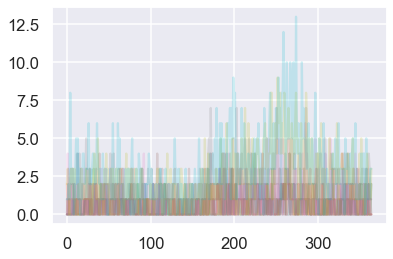

In [109]:
for y in range(30,40):
    plt.plot(np.arange(365), reported_cases[y*365:(y+1)*365],label=y, alpha=0.2)

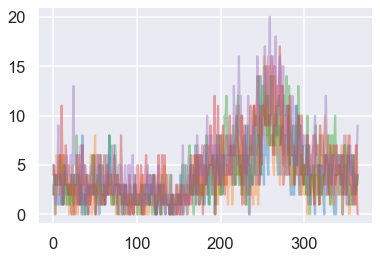

In [110]:
for y in range(40,45):
    plt.plot(np.arange(365), reported_cases[y*365:(y+1)*365],label=y, alpha=0.4)

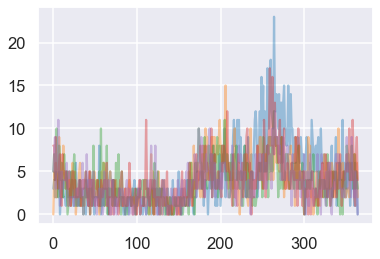

In [111]:
for y in range(45,50):
    plt.plot(np.arange(365), reported_cases[y*365:(y+1)*365],label=y, alpha=0.4)

In [112]:
cases_norm = reported_cases[40*365:45*365]

df_list = []
for y in range(5):
    cases_this_year = cases_norm[y*365:(y+1)*365]
    sdf = pd.DataFrame({
        "year": y,
        "day": np.arange(365),
        "week": w,
        "two_w": two_w,
        "cases": cases_this_year,
        "cases_norm": cases_this_year/np.max(cases_this_year)
    })
    
    sdf_agg_to_week = sdf.groupby("week").agg({"cases": "sum"}).reset_index()
    sdf_agg_to_week["cases_norm"] = sdf_agg_to_week["cases"]/np.max(sdf_agg_to_week["cases"])
    sdf_agg_to_week["year"] = y
    
    sdf_agg_to_2week = sdf.groupby("two_w").agg({"cases": "sum"}).reset_index()
    sdf_agg_to_2week["cases_norm"] = sdf_agg_to_2week["cases"]/np.max(sdf_agg_to_2week["cases"])
    sdf_agg_to_2week["year"] = y
    
    df_list.append(sdf_agg_to_2week.copy())
#     df_list.append(sdf_agg_to_week.copy())
#     df_list.append(sdf.copy())
    
df = pd.concat(df_list)

In [113]:
df_smooth = df.groupby("week").agg({"cases_norm": "median"}).reset_index()

KeyError: 'week'

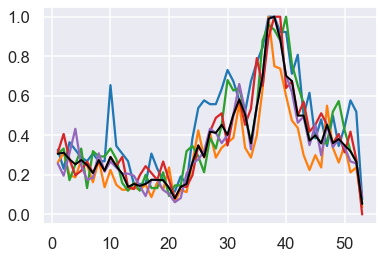

In [75]:
for y, sdf in df.groupby("year"):
    plt.plot(sdf["week"], sdf["cases_norm"])
plt.plot(df_smooth["week"], df_smooth["cases_norm"], color='black', lw=2)

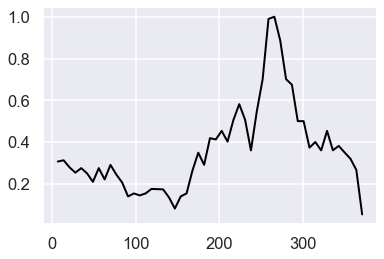

In [76]:
plt.plot(df_smooth["week"]*7, df_smooth["cases_norm"]/np.max(df_smooth["cases_norm"]), color='black', lw=2)
plt.savefig("figures/2021-04-13_dryrun/sahel_incidence_seasonality.pdf")

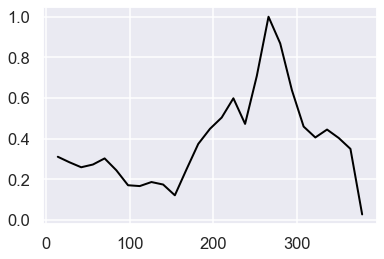

In [115]:
df_smooth = df.groupby("two_w").agg({"cases_norm": "mean"}).reset_index()
plt.plot(df_smooth["two_w"]*14, df_smooth["cases_norm"]/np.max(df_smooth["cases_norm"]), color='black', lw=2)
plt.savefig("figures/2021-04-13_dryrun/southern_incidence_seasonality_twoweek.pdf")